# Breast Cancer Prediction
Build a predictive model to predict whether a patient has breast cancer or not.
### Type: Classification (Supervised segmentation)
### Procedures
* Data loading, inspection and cleaning
* Exploratory Data analysis
* Data splitting
* Training the model with diffrent algorithms
* tune the best performing model using Gridsearch & bayesian search
* Evaluating and selecting the best model
* Save the model for future development & deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data understanding 

In [2]:
data = pd.read_csv('data/breast-cancer.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
names= ['class','age', 'menopause', 'tumor size', 
        'inv-node',  'node-gap', 'deg-malig', 'breast', 
        'breast-quad', 'irradiat' ]

In [5]:
data.columns = names

In [6]:
data.head()

,class,age,menopause,tumor size,inv-node,node-gap,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor size   286 non-null    object
 4   inv-node     286 non-null    object
 5   node-gap     286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
print('No. of rows ', data.shape[0])
print('No. of columns ', data.shape[1])

No. of rows  286
No. of columns  10


In [9]:
data.isna().sum()

class          0
age            0
menopause      0
tumor size     0
inv-node       0
node-gap       0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [10]:
data['class'].replace({'no-recurrence-events':0, 'recurrence-events':1}, inplace=True)

# Exloratory Data Analysis

In [11]:
# target class distrubution
data['class'].value_counts(normalize=True)

0    0.702797
1    0.297203
Name: class, dtype: float64

<AxesSubplot:title={'center':'Target Variable'}>

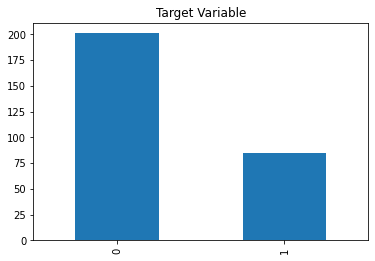

In [12]:
data['class'].value_counts().plot(kind='bar', title='Target Variable')

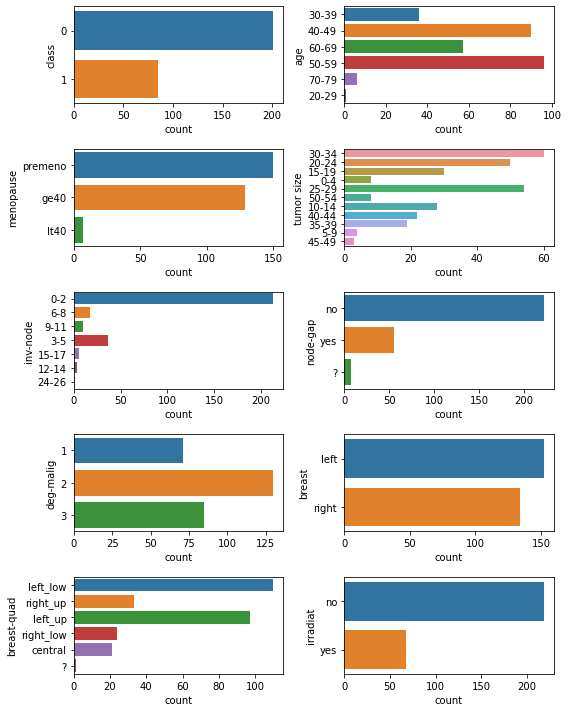

In [13]:
# counts of categorical data
plt.figure(figsize=(8, 10))
for index, columns in enumerate(data.columns):
    plt.subplot(5, 2, index+1)
    plt.tight_layout()
    sns.countplot(y= data[columns])

In [14]:
# columns

for col in data.columns:
    print(col)
    print('----------')
    print(data[col].value_counts(normalize=True), '\n\n')
    print('===================================')

class
----------
0    0.702797
1    0.297203
Name: class, dtype: float64 


age
----------
50-59    0.335664
40-49    0.314685
60-69    0.199301
30-39    0.125874
70-79    0.020979
20-29    0.003497
Name: age, dtype: float64 


menopause
----------
premeno    0.524476
ge40       0.451049
lt40       0.024476
Name: menopause, dtype: float64 


tumor size
----------
30-34    0.209790
25-29    0.188811
20-24    0.174825
15-19    0.104895
10-14    0.097902
40-44    0.076923
35-39    0.066434
0-4      0.027972
50-54    0.027972
5-9      0.013986
45-49    0.010490
Name: tumor size, dtype: float64 


inv-node
----------
0-2      0.744755
3-5      0.125874
6-8      0.059441
9-11     0.034965
15-17    0.020979
12-14    0.010490
24-26    0.003497
Name: inv-node, dtype: float64 


node-gap
----------
no     0.776224
yes    0.195804
?      0.027972
Name: node-gap, dtype: float64 


deg-malig
----------
2    0.454545
3    0.297203
1    0.248252
Name: deg-malig, dtype: float64 


breast
----------
le

In [15]:
# ages by target
pd.DataFrame(data.groupby('age')['class'].value_counts())

class
age   class       
20-29 0          1
30-39 0         21
      1         15
40-49 0         63
      1         27
50-59 0         71
      1         25
60-69 0         40
      1         17
70-79 0          5
      1          1

In [16]:
# menopause by class
pd.DataFrame(data.groupby('menopause')['class'].value_counts())

class
menopause class       
ge40      0         94
          1         35
lt40      0          5
          1          2
premeno   0        102
          1         48

In [17]:
list(data)

['class',
 'age',
 'menopause',
 'tumor size',
 'inv-node',
 'node-gap',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat']

In [18]:
# tumor size by class
pd.DataFrame(data.groupby('tumor size')['class'].value_counts())

class
tumor size class       
0-4        0          7
           1          1
10-14      0         27
           1          1
15-19      0         23
           1          7
20-24      0         34
           1         16
25-29      0         36
           1         18
30-34      0         35
           1         25
35-39      0         12
           1          7
40-44      0         16
           1          6
45-49      0          2
           1          1
5-9        0          4
50-54      0          5
           1          3

# feature engineering

In [19]:
data.head()

,class,age,menopause,tumor size,inv-node,node-gap,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [20]:
data['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [21]:
data['age'].value_counts(normalize=True)

50-59    0.335664
40-49    0.314685
60-69    0.199301
30-39    0.125874
70-79    0.020979
20-29    0.003497
Name: age, dtype: float64

In [22]:
pd.DataFrame(data.groupby(['inv-node'])['class'].value_counts())

class
inv-node class       
0-2      0        167
         1         46
12-14    1          2
         0          1
15-17    0          3
         1          3
24-26    1          1
3-5      0         19
         1         17
6-8      1         10
         0          7
9-11     1          6
         0          4

In [23]:
data['age']= np.where(data['age'].isin(['20-29', '30-39']), '20-39', data['age'])
data['inv-node']= np.where(data['inv-node'].isin(['12-14', '15-17', '24-26']), '12-26', data['inv-node'])
data['menopause']=np.where(data['menopause'].isin(['ge40', 'lt40']), 'ge40 or lt40', data['menopause'])
data['tumor size']= np.where(data['tumor size'].isin(['5-9', '45-49']), '5-9 or 45-49', data['tumor size'])

In [24]:
# 20-29 is less than 1% of the observation so we drop it
#data = data[~data['age'].isin(['20-29', '70-79']) ]

# '?' is also less than 1% of the data so we drop that too
data= data[data['breast-quad'] != '?']

# 24-25 less than 1% of the observation
#data= data[data['inv-node'] != '24-26']

In [25]:
data= data[~data['node-gap'].isin(['?'])]
#data= data[~data['menopause'].isin(['lt40'])]

In [26]:
data.head()

,class,age,menopause,tumor size,inv-node,node-gap,deg-malig,breast,breast-quad,irradiat
0,0,20-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40 or lt40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [27]:
data['menopause'].unique()

array(['premeno', 'ge40 or lt40'], dtype=object)

In [28]:
data.shape

(277, 10)

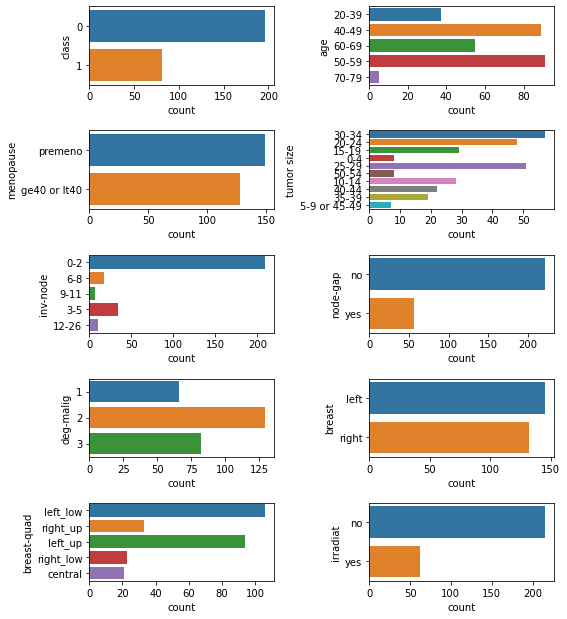

In [29]:
plt.figure(figsize=(8, 10))
for index, columns in enumerate(data.columns):
    plt.subplot(6, 2, index+1)
    plt.tight_layout()
    sns.countplot(y= data[columns])

In [30]:
# create new features

In [31]:
data['age group']= np.where(data['age'].isin(['30-39',]), 'young adult', '')
data['age group']= np.where(data['age'].isin(['40-49', '50-59',]), 'middle age', data['age group'])
data['age group']= np.where(data['age'].isin(['60-69', '70-79',]), 'old age',data['age group'])

In [32]:
data.head()

,class,age,menopause,tumor size,inv-node,node-gap,deg-malig,breast,breast-quad,irradiat,age group
0,0,20-39,premeno,30-34,0-2,no,3,left,left_low,no,
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no,middle age
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no,middle age
3,0,60-69,ge40 or lt40,15-19,0-2,no,2,right,left_up,no,old age
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no,middle age


In [33]:
data['tumor size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9 or 45-49'], dtype=object)

In [34]:
data['tumor size (binned)'] =\
    np.where(data['tumor size'].isin(['0-4', '5-9', '10-14', '15-19','20-24',]), '0-24', '')
data['tumor size (binned)'] = \
       np.where(data['tumor size'].isin(['25-29', '30-34', '35-39']), '25-39', data['tumor size (binned)'])
data['tumor size (binned)'] = \
         np.where(data['tumor size'].isin(['40-44','45-49', '50-54',]), '40-54', data['tumor size (binned)'])

In [35]:
data.head()

,class,age,menopause,tumor size,inv-node,node-gap,deg-malig,breast,breast-quad,irradiat,age group,tumor size (binned)
0,0,20-39,premeno,30-34,0-2,no,3,left,left_low,no,,25-39
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no,middle age,0-24
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no,middle age,0-24
3,0,60-69,ge40 or lt40,15-19,0-2,no,2,right,left_up,no,old age,0-24
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no,middle age,0-24


In [36]:
data['deg-malig'] = data['deg-malig'].astype('object')

In [37]:
data['deg-malig'].unique()

array([3, 2, 1], dtype=object)

# Model Development

In [38]:
# classifiers
#import lightgbm as lgm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# preprocessing & splitting & evaluation
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import learning_curve, KFold, train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# to handle imbalance nature of the target class (if there exist any).
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline as Imblearn_Pipeline

#smote = SMOTE()

In [39]:
X = data.iloc[:, 1:]
y = data['class']

In [40]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.3, stratify=y)

In [41]:
print('Training set: ', X_train.shape)
print('Testing set: ', X_test.shape)

Training set:  (193, 11)
Testing set:  (84, 11)


In [42]:
list(data)

['class',
 'age',
 'menopause',
 'tumor size',
 'inv-node',
 'node-gap',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat',
 'age group',
 'tumor size (binned)']

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   class                277 non-null    int64 
 1   age                  277 non-null    object
 2   menopause            277 non-null    object
 3   tumor size           277 non-null    object
 4   inv-node             277 non-null    object
 5   node-gap             277 non-null    object
 6   deg-malig            277 non-null    object
 7   breast               277 non-null    object
 8   breast-quad          277 non-null    object
 9   irradiat             277 non-null    object
 10  age group            277 non-null    object
 11  tumor size (binned)  277 non-null    object
dtypes: int64(1), object(11)
memory usage: 36.2+ KB


In [44]:
# build a pipeline
cols = list(X_train.iloc[:, 0:])

transformer = ColumnTransformer([('one hot', OneHotEncoder(), cols )])

model_pipe = Pipeline([('transformer', transformer), 
                       ('classifier', LogisticRegression())
                      ])

In [45]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('one hot', OneHotEncoder(),
                                                  ['age', 'menopause',
                                                   'tumor size', 'inv-node',
                                                   'node-gap', 'deg-malig',
                                                   'breast', 'breast-quad',
                                                   'irradiat', 'age group',
                                                   'tumor size (binned)'])])),
                ('classifier', LogisticRegression())])

In [46]:
model_pipe.predict(X_test.iloc[1:40, :])

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [47]:
model_pipe.score(X_test, y_test)

0.7261904761904762

# Evaluation

In [48]:
lr = LogisticRegression(C=1000, class_weight='balanced', max_iter=100000)
svc = SVC(C=1000, class_weight='balanced')
tree = DecisionTreeClassifier(max_features=5, max_depth=10, max_leaf_nodes=10)
rf= RandomForestClassifier(max_depth=20, max_features=7, class_weight='balanced')

In [49]:
models = [lr, svc, tree, rf]; names= ['logit', 'svc', 'decision tree', 'random forest']

In [50]:
# train different algorithms and score & evaluate them..
from sklearn.pipeline import Pipeline
model_list= []
acc = []

for name, model in zip(names, models):
    
    pipe = Pipeline([('transformer', transformer),
                       ('classifier'+str(name), model)
                      ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    model_list.append(pipe)
    

In [51]:
# accuracy scores
pd.Series(acc, index=names)

logit            0.726190
svc              0.702381
decision tree    0.666667
random forest    0.750000
dtype: float64

In [52]:
# Classifiction report
for name, model in zip(names, model_list):
    preds = model.predict(X_test)
    print('======================================================================\n')
    print(name+' classification report')
    print(classification_report(y_test, preds))


logit classification report
              precision    recall  f1-score   support

           0       0.85      0.75      0.79        59
           1       0.53      0.68      0.60        25

    accuracy                           0.73        84
   macro avg       0.69      0.71      0.69        84
weighted avg       0.75      0.73      0.73        84


svc classification report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        59
           1       0.50      0.36      0.42        25

    accuracy                           0.70        84
   macro avg       0.63      0.60      0.61        84
weighted avg       0.68      0.70      0.69        84


decision tree classification report
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        59
           1       0.29      0.08      0.12        25

    accuracy                           0.67        84
   macro avg       0.49      0.50  

In [53]:
k = KFold(n_splits=20, shuffle=True)

myscores = []
for  model in model_list:
        scores = cross_val_score(
            model,
            X = X_train,
            y = y_train,
            scoring='accuracy',
            cv=k, )
        myscores.append(scores)

Text(0.5, 1.0, 'accuracy scores')

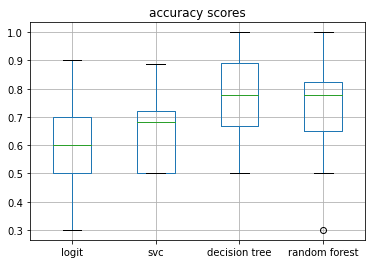

In [54]:
ax = pd.DataFrame(myscores, index=names).T.boxplot()
ax.set_title('accuracy scores')

<AxesSubplot:title={'center':'Feature Importance (Decision Tree)'}>

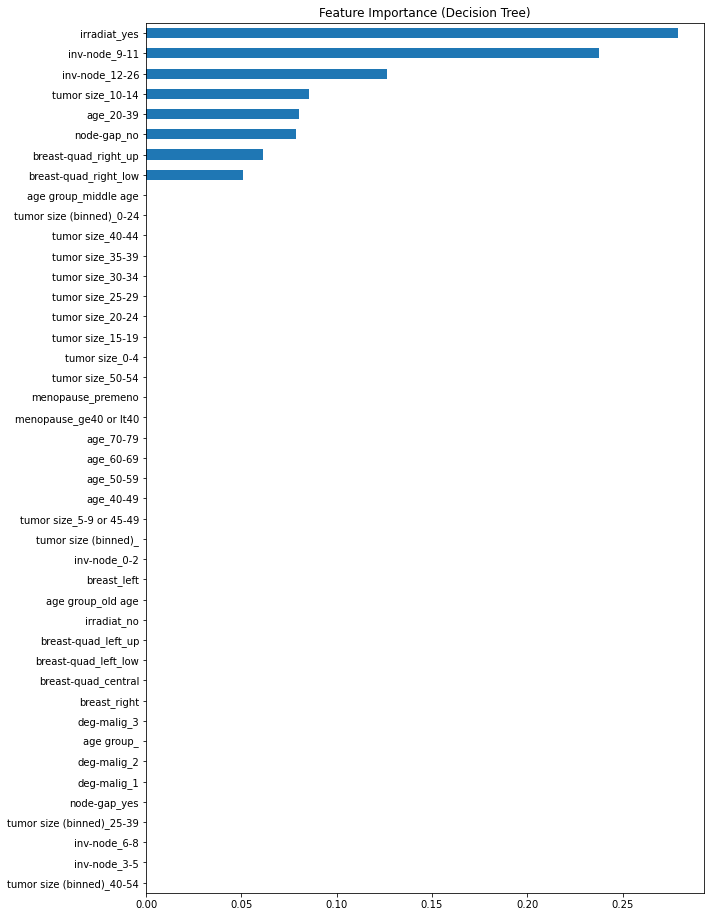

In [55]:
# decsion tree 
imps = model_list[2].named_steps['classifierdecision tree'].feature_importances_
named = model_list[2].named_steps['transformer'].transformers_[0][1].get_feature_names(cols)
pd.Series(imps, index=named).sort_values().plot(kind='barh', figsize=(10, 16), 
                                                title='Feature Importance (Decision Tree)')

<AxesSubplot:title={'center':'Feature Importance (Random Forest)'}>

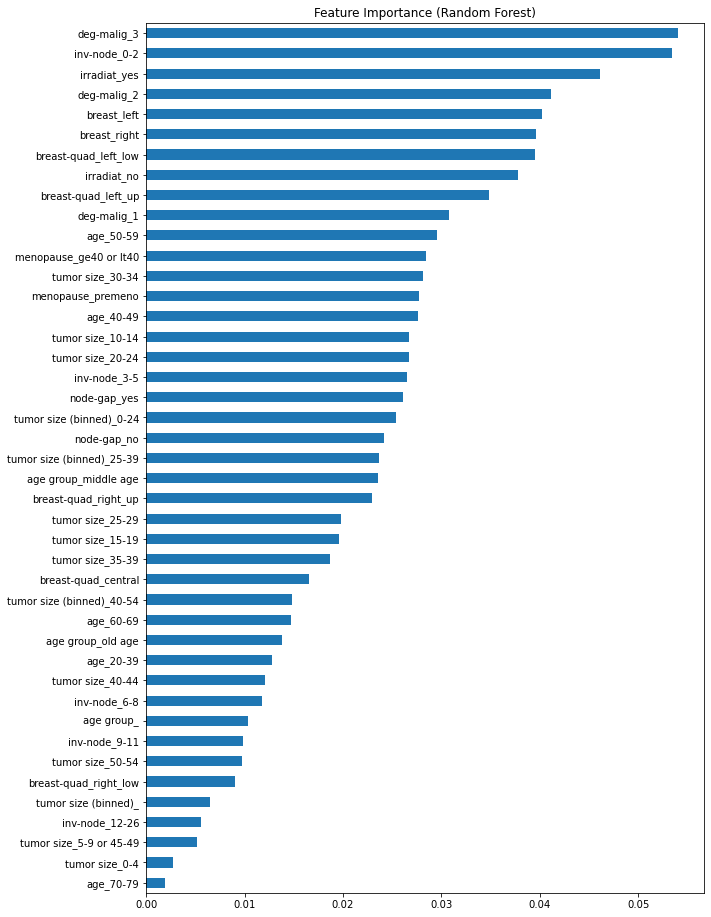

In [56]:
# random forest classifier generated feature importance
imps = model_list[3].named_steps['classifierrandom forest'].feature_importances_
named = model_list[3].named_steps['transformer'].transformers_[0][1].get_feature_names(cols)
pd.Series(imps, index=named).sort_values().plot(kind='barh', figsize=(10, 16),
                                                title='Feature Importance (Random Forest)')

# tuning hyper-parameters using gridsearch

In [57]:
# Tuning the best performing model...
from sklearn.model_selection import GridSearchCV

para_grid = {'clf__max_depth': [10, 11, 13, 17, 20, 31],
            'clf__max_features': [3, 4, 5, 6, 7, 10, 12, 17],
            'clf__max_leaf_nodes': [2, 10, 13, 17],
             'clf__n_estimators': [200]
            }

rf_pipe = Pipeline([('col transf', transformer), ('clf', RandomForestClassifier())] )

tuned_rf =GridSearchCV(rf_pipe, para_grid, n_jobs=-1)
tuned_rf.fit(X_train, y_train);

In [58]:
tuned_rf.best_score_

0.7618083670715249

In [59]:
# save the model
from joblib import dump
dump(tuned_rf, 'output/model.pkl')

['output/model.pkl']

In [60]:
# report 
preds= tuned_rf.predict(X_test)
print('Confusion matrix::\n', confusion_matrix(y_test, preds), '\n')

print('Classification report::\n', classification_report(y_test, preds))

Confusion matrix::
 [[58  1]
 [20  5]] 

Classification report::
               precision    recall  f1-score   support

           0       0.74      0.98      0.85        59
           1       0.83      0.20      0.32        25

    accuracy                           0.75        84
   macro avg       0.79      0.59      0.58        84
weighted avg       0.77      0.75      0.69        84



In [64]:
pd.DataFrame(confusion_matrix(y_test, preds), index=['neg class', 'pos class'], columns=['pred-neg', 'pred-pos'])

,pred-neg,pred-pos
neg class,58,1
pos class,20,5


# tuning hyper-parameters using bayesian search